### <span style="color:#1976D2;">Day 5 Task</span>

<span>**Done by:** <span style="color:#388E3C;">Ishat Noor Mahi</span>  
**ID:** <span style="color:#D32F2F;">Mahi-3006</span></span>

In [3]:
import pandas as pd

In [4]:
dataset = '../../Datasets/titanic-cs.csv'
data = pd.read_csv(dataset)
df  = pd.DataFrame(data)
print(df.columns)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [42]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [5]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Cabin'] = df['Cabin'].fillna('Unknown')
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [6]:
df.to_csv('titanic-cs-cleaned.csv')

In [27]:
num_cols = ['Age', 'Fare','SibSp','Parch']
outliers = {}
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    mask = (df[col] < lower) | (df[col] > upper)
    outliers[col] = df.loc[mask, col]

print("Outliers in Age:\n", outliers["Age"])
print("Outliers in Fare:\n", outliers["Fare"])
print("Outliers in Parents/Children Aboard:\n", outliers["Parch"])
print("Outliers in Siblings/Spouses Aboard:\n", outliers["SibSp"])

Outliers in Age:
 7       2.00
11     58.00
15     55.00
16      2.00
33     66.00
       ...  
827     1.00
829    62.00
831     0.83
851    74.00
879    56.00
Name: Age, Length: 66, dtype: float64
Outliers in Fare:
 1       71.2833
27     263.0000
31     146.5208
34      82.1708
52      76.7292
         ...   
846     69.5500
849     89.1042
856    164.8667
863     69.5500
879     83.1583
Name: Fare, Length: 116, dtype: float64
Outliers in Parents/Children Aboard:
 7      1
8      2
10     1
13     5
16     1
      ..
871    1
879    1
880    1
885    5
888    2
Name: Parch, Length: 213, dtype: int64
Outliers in Siblings/Spouses Aboard:
 7      3
16     4
24     3
27     3
50     4
59     5
63     3
68     4
71     5
85     3
88     3
119    4
159    8
164    4
171    4
176    3
180    8
182    4
201    8
229    3
233    4
261    4
266    4
278    4
324    8
341    3
374    3
386    5
409    3
480    5
485    3
541    4
542    4
634    3
642    3
683    5
686    4
726    3
787    4
7

In [31]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [39]:
pivot_table = df.pivot_table(values='Survived', index='Pclass', columns='Sex', aggfunc='mean') * 100
print(pivot_table)

Sex        female       male
Pclass                      
1       96.808511  36.885246
2       92.105263  15.740741
3       50.000000  13.544669


In [40]:
#verify manually
rich_ladies = df[(df['Pclass'] == 1) & (df['Sex'] == 'female')].count()
alive_rich_ladies = df[(df['Pclass'] == 1) & (df['Sex'] == 'female') & (df['Survived'] == 1)].count()
percentage = (alive_rich_ladies / rich_ladies * 100)
print(percentage) #96.8085 matches the pivot table data

PassengerId    96.808511
Survived       96.808511
Pclass         96.808511
Name           96.808511
Sex            96.808511
Age            96.808511
SibSp          96.808511
Parch          96.808511
Ticket         96.808511
Fare           96.808511
Cabin          96.808511
Embarked       96.808511
dtype: float64


            Age      Fare     SibSp     Parch
Age    1.000000  0.091566 -0.232625 -0.179191
Fare   0.091566  1.000000  0.159651  0.216225
SibSp -0.232625  0.159651  1.000000  0.414838
Parch -0.179191  0.216225  0.414838  1.000000


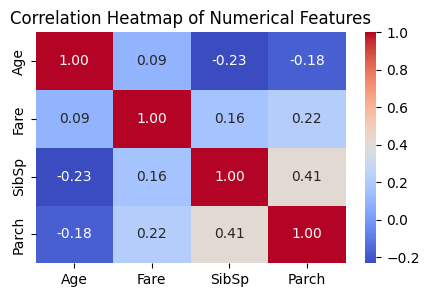

In [41]:
import seaborn as sns

import matplotlib.pyplot as plt

numerical_features = df[num_cols]

corr_matrix = numerical_features.corr()
print(corr_matrix)

# Plot heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

Text(0, 0.5, 'Count')

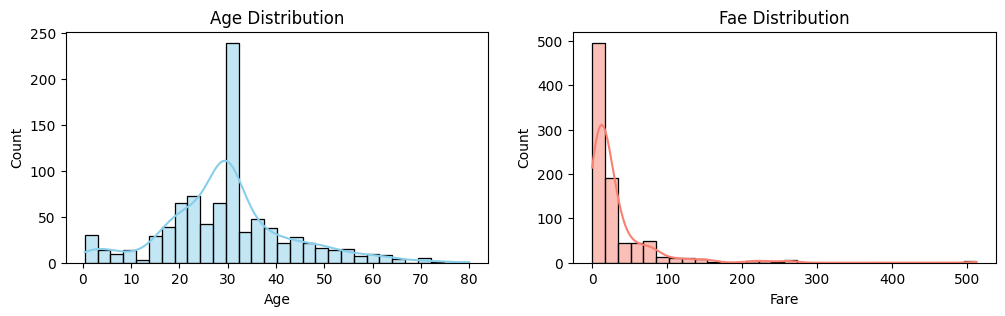

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 3))  # bigger for 4 plots

# Top-left: Age
plt.subplot(1, 2, 1)
sns.histplot(df['Age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

# Top-right: Fare
plt.subplot(1, 2, 2)
sns.histplot(df['Fare'], bins=30, kde=True, color='salmon')
plt.title('Fae Distribution')
plt.xlabel('Fare')
plt.ylabel('Count')



C:\Users\DELL\AppData\Local\Temp\ipykernel_13696\2188335680.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=df, palette='Set2')


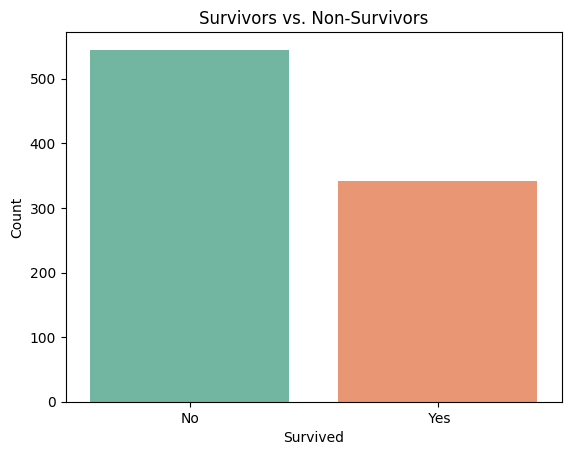

In [13]:
sns.countplot(x='Survived', data=df, palette='Set2')
plt.title('Survivors vs. Non-Survivors')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()